In [1]:
import pandas as pd
import numpy as np

# visualization library
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# model build libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and Understanding the Data

In [2]:
# Load the file
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# set "instant" columns as an index
bike.set_index("instant", inplace=True)

In [4]:
bike.shape

(730, 15)

In [5]:
# Checking null values
bike.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### summary 
- There is no null values in the data

## Visualizing the data
- We can observe multicollinearity from visualising the data.
- Identify some features are strongly correlated with predcitor

In [6]:
px.line(bike[["mnth", "casual", "registered", "cnt"]].groupby("mnth").agg({"casual": "sum", "registered": "sum"}))

### summary:
 - During months April to October there is a raise in demand
 - Registered user proportional rise is more compared to casual users

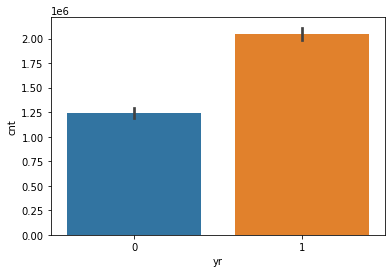

In [7]:
sns.barplot(data=bike, x="yr", y="cnt", estimator=np.sum)
plt.show()

In [8]:
# Dropping the 'casual' and the 'registered' columns as cnt = casual + registered
# Dropping the column 'dteday' data is already available in 'yr', 'mnth', 'weekday', 'workingday', 'holiday' columns
bike.drop(["casual", "registered", "dteday", "yr"], axis=1, inplace=True)

<AxesSubplot:>

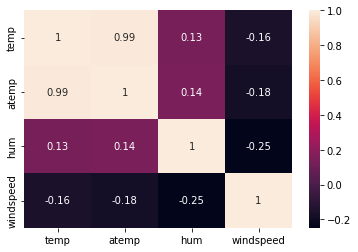

In [9]:
sns.heatmap(
    bike[["temp", "atemp", "hum", "windspeed"]].corr(),
    annot=True
)

#### summary
 - temp and atemp have correlation is 0.99, hence atemp is to be dropped

In [10]:
# drop atemp
bike.drop(["atemp"], axis=1, inplace=True)

In [11]:
# Histogram plot function
def display_hist_plot(data, x=None, bins=30, **kwargs):
    fig = px.histogram(data, x=x, nbins=bins)
    if kwargs:
        fig.update_layout(**kwargs)
    fig.show()

In [12]:
# Bar plot function
def display_bar_plot(data, x=None, y=None, **kwargs):
    fig = px.bar(data, x=x, y=y)
    if kwargs:
        fig.update_layout(**kwargs)
    fig.show()

In [13]:
display_hist_plot(
    data=bike,
    x="temp",
    title_text="Temprature data distribution",
    xaxis_title_text="Temprature",
)

In [14]:
display_hist_plot(
    data=bike,
    x="hum",
    title_text="Humidity data distribution",
    xaxis_title_text="Humidity",
)

### Humidity characteristics 
<p><small>these are actual values from source: <a href=https://www.weather.gov/arx/why_dewpoint_vs_humidity>humidity</a> <br>
   less than or equal to 55: dry and comfortable.  <br>
   between 55 and 65: becoming "sticky" with muggy evenings. <br>
   greater than or equal to 65: lots of moisture in the air, becoming oppressive. </small></p> <br>

In [15]:
display_hist_plot(
    data=bike,
    x="windspeed",
    title_text="Wind Speed data distribution",
    xaxis_title_text="Wind Speed",
)

In [16]:
# Based on the column description, we can map the values as follows
bike["season"] = bike["season"].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
bike["weathersit"] = bike["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light_Snow", 4: "Heavy Rain"})

In [17]:
months ={1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
        7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
        }

bike["mnth"] = bike["mnth"].map(months)

In [18]:
display_bar_plot(
    data=bike,
    x="mnth",
    y="cnt",
    title_text="Monthwise Bike Rental Demand",
    xaxis_title_text="Months",
    yaxis_title_text="Bike Rental Count",
)

In [19]:
display_bar_plot(
    data=bike,
    x="season",
    y="cnt",
    title_text="Seasonwise Bike Rental Demand",
    xaxis_title_text="Season",
    yaxis_title_text="Bike Rental Count",
)

### Summary:
- From above, bike demand will be more on during fall i.e. during June, July, August, September

In [20]:
display_bar_plot(
    data=bike,
    x="workingday",
    y="cnt",
    title_text="Bike Rental Demand During workingday",
    xaxis_title_text="workingday",
    yaxis_title_text="Bike Rental Count",
)

In [21]:
bike["holiday_text"] = bike["holiday"].map({0:"Non-Holiday", 1: "Holiday"})

In [22]:
px.bar(bike, x="weekday", y="cnt", color='holiday_text', barmode='group',)

In [23]:
display_bar_plot(
    data=bike,
    x="weathersit",
    y="cnt",
    title_text="Bike Rental Demand in different weather conditions"
)

### Summary
- Bike rental demand is more especially during Friday and Saturday weekdays.
- Bike rental demand is more during holidays than workingdays compartively(by proportion)
- Bike rental demand is more when weather is clear

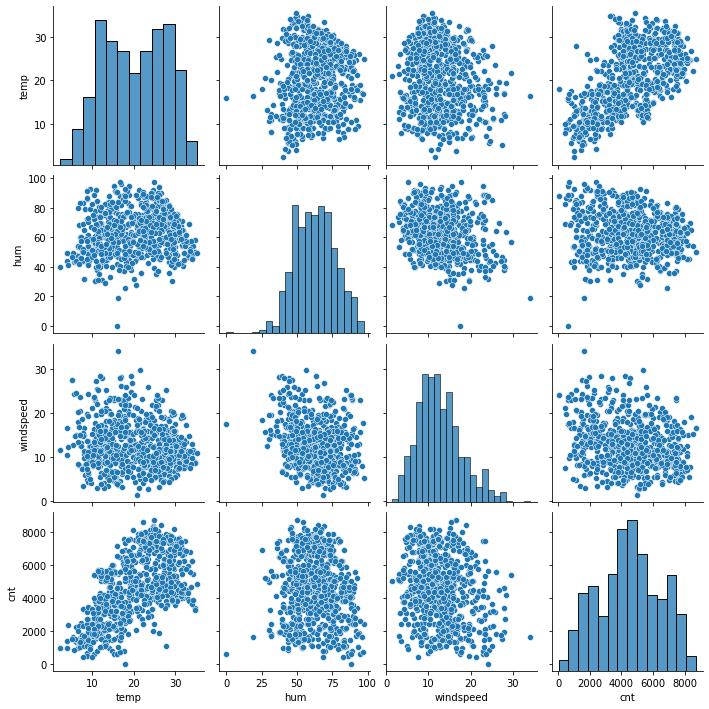

In [24]:
sns.pairplot(data=bike[["temp", "hum", "windspeed", "cnt"]])

In [25]:
bike.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,holiday_text
instant,,,,,,,,,,,
1,spring,Jan,0,6,0,Mist,14.110847,80.5833,10.749882,985,Non-Holiday
2,spring,Jan,0,0,0,Mist,14.902598,69.6087,16.652113,801,Non-Holiday
3,spring,Jan,0,1,1,Clear,8.050924,43.7273,16.636703,1349,Non-Holiday
4,spring,Jan,0,2,1,Clear,8.200000,59.0435,10.739832,1562,Non-Holiday
5,spring,Jan,0,3,1,Clear,9.305237,43.6957,12.522300,1600,Non-Holiday


## Data preparation/feature scaling

In [26]:
season_df = pd.get_dummies(bike["season"], drop_first=True)
bike = pd.concat([bike, season_df], axis=1)

In [27]:
weather_df = pd.get_dummies(bike["weathersit"], drop_first=True)
bike = pd.concat([bike, weather_df], axis=1)

In [28]:
bike["workingday"] = bike["workingday"].map({1: "WorkingDay", 0: "Non-WorkingDay"})

In [29]:
working_df = pd.get_dummies(bike["workingday"], drop_first=True)
bike = pd.concat([bike, working_df], axis=1)

In [30]:
bike.drop(["workingday", "weathersit", "season", "holiday_text", "mnth"], axis=1, inplace=True)
bike.head()

,mnth,holiday,weekday,temp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist,WorkingDay
instant,,,,,,,,,,,,,
1,Jan,0,6,14.110847,80.5833,10.749882,985,1,0,0,0,1,0
2,Jan,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0
3,Jan,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1
4,Jan,0,2,8.200000,59.0435,10.739832,1562,1,0,0,0,0,1
5,Jan,0,3,9.305237,43.6957,12.522300,1600,1,0,0,0,0,1


## Model building

In [37]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
scaler = MinMaxScaler()

In [39]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,holiday,weekday,temp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist,WorkingDay
instant,,,,,,,,,,,,
654,0,2,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,1
577,0,2,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,1
427,0,6,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0
729,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0
483,0,6,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0


In [41]:
df_train.describe()

,holiday,weekday,temp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist,WorkingDay
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.025490,2.990196,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.676471
std,0.157763,2.017093,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,0.000000,5.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


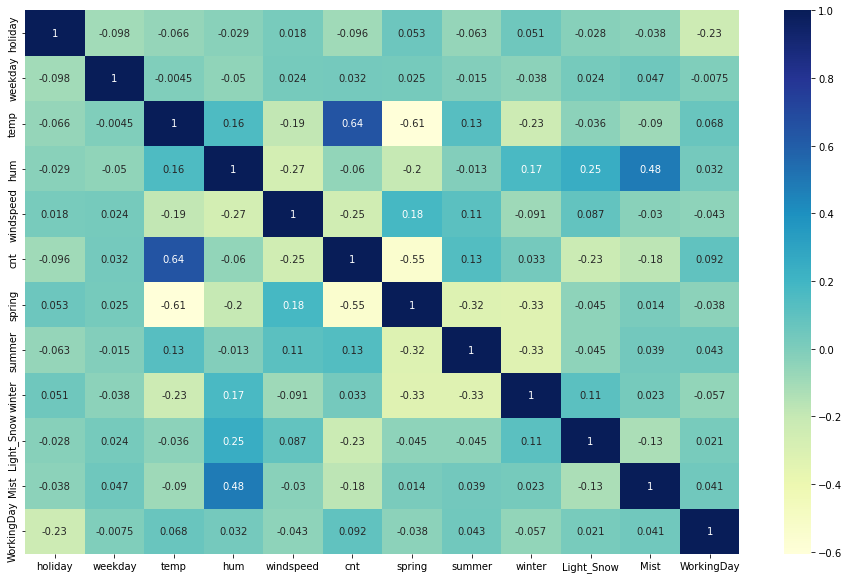

In [42]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

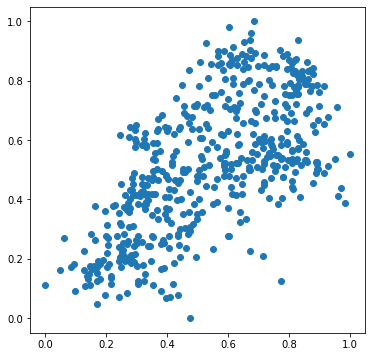

In [43]:
# we can observe that, temprature is correlated highly with demand
plt.figure(figsize=[6,6])
plt.scatter(df_train["temp"], df_train["cnt"])
plt.show()

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [46]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

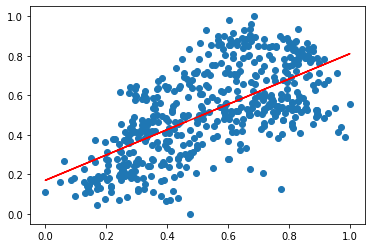

In [47]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.64*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [48]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           5.80e-61
Time:                        00:18:18   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is 0.414. Now, we add another variable "summer"

In [49]:
X_train_lm = X_train[['temp', 'summer']]
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.166494
temp      0.633159
summer    0.028369
dtype: float64

In [50]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     181.3
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.91e-60
Time:                        00:23:49   Log-Likelihood:                 176.11
No. Observations:                 510   AIC:                            -346.2
Df Residuals:                     507   BIC:                            -333.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1665      0.020      8.426      0.000       0.128       0.205
temp           0.6332      0.034     18.627      0.000       0.566       0.700
summer         0.0284      0.018      1.591      0.112      -0.007       0.063
==============================================================================
Omnibus:                        6.815   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.932
Skew:                           0.110   Prob(JB):                       0.0849
Kurtosis:                       2.572   Cond. No.                         5.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""